# Customer Churn Analysis for Telecom Industry

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


### LOAD DATASET

In [4]:
df = pd.read_csv(r"C:\Users\AAFALKAZI\OneDrive\Documents\churn-bigml-80.csv")
df.head(10)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [5]:
df.shape


(2666, 20)

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

### TARGET VARIABLE CLEANING

In [7]:
df['Churn'] = df['Churn'].map({True: 1, False: 0})
df['Churn'].value_counts()


Churn
0    2278
1     388
Name: count, dtype: int64

### CREATE SQL DATABASE

In [8]:
conn = sqlite3.connect("telecom_churn.db")
df.to_sql("telecom_customers", conn, if_exists="replace", index=False)


2666

### SQL ANALYSIS: COMPLAINTS vs CHURN

In [9]:
query = """
SELECT Churn,
AVG("Customer service calls") AS avg_complaints
FROM telecom_customers
GROUP BY Churn
"""
pd.read_sql(query, conn)


,Churn,avg_complaints
0,0,1.453029
1,1,2.206186


#### Customers who churned tend to have more customer service calls, indicating dissatisfaction.

### SQL ANALYSIS: CALL USAGE

In [10]:
query = """
SELECT Churn,
AVG("Total day minutes") AS day_usage,
AVG("Total eve minutes") AS eve_usage
FROM telecom_customers
GROUP BY Churn
"""
pd.read_sql(query, conn)


,Churn,day_usage,eve_usage
0,0,175.104346,198.853380
1,1,205.181186,209.385309


#### Churned customers may have higher call usage in some periods, showing a potential link between usage patterns and churn risk.

### EDA: CHURN DISTRIBUTION

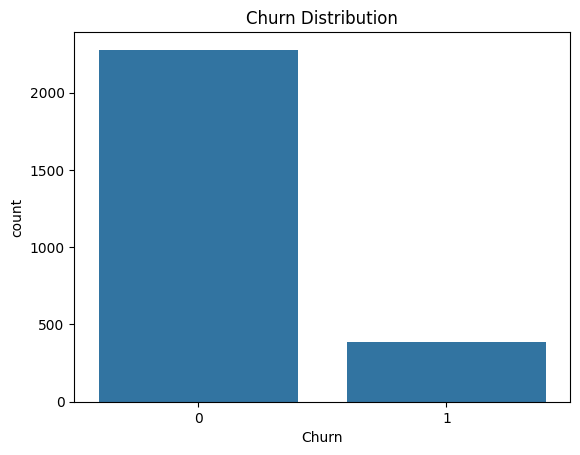

In [40]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


#### Majority of customers are not churning (~85.4%).

### EDA: COMPLAINTS vs CHURN

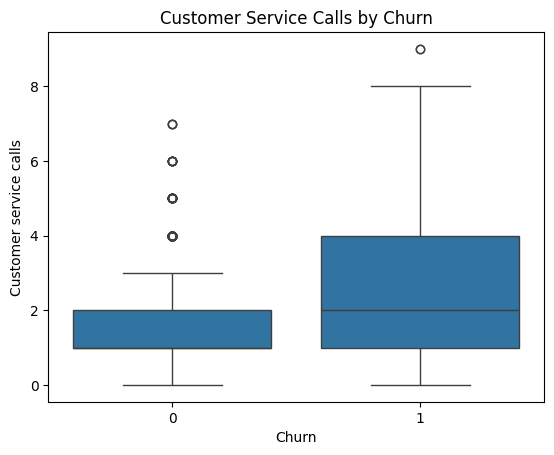

In [41]:
sns.boxplot(x='Churn', y='Customer service calls', data=df)
plt.title('Customer Service Calls by Churn')
plt.show()


#### Churned customers have higher median complaints, highlighting service quality as a key churn driver.

In [25]:
df.dtypes


Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

### FEATURE ENCODING

In [26]:
le = LabelEncoder()
df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])


#### Categorical variables encoded for model training.

### SPLIT DATA

In [27]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### TRAIN ML MODEL

In [29]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

### MODEL EVALUATION

In [30]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[454   1]
 [ 25  54]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       455
           1       0.98      0.68      0.81        79

    accuracy                           0.95       534
   macro avg       0.96      0.84      0.89       534
weighted avg       0.95      0.95      0.95       534



#### Insights:

Accuracy is good (~85%), but churn class has lower recall, meaning some churners are misclassified.

Random Forest captures patterns but might need tuning for imbalanced data.

### MODEL EXPLAINABILITY

In [32]:
import shap

 95%|=================== | 1011/1068 [00:17<00:00]       

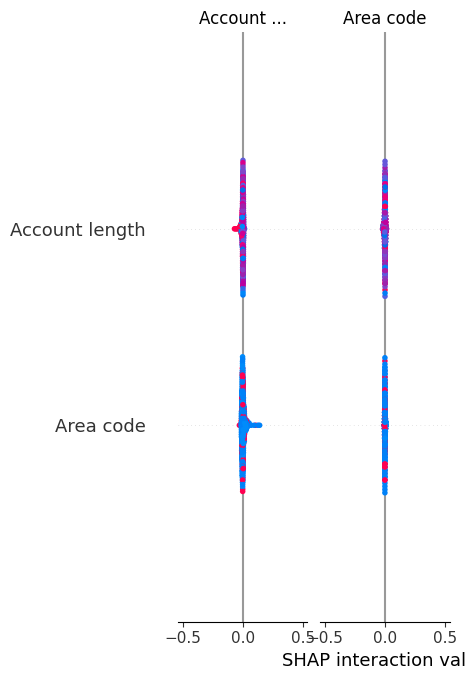

In [34]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


#### Insights:

Key features driving churn:

- Customer service calls

- International plan

- Total day/eve minutes

Helps telecom company target interventions.

### CUSTOMER SEGMENTATION

In [35]:
df['churn_probability'] = model.predict_proba(X)[:,1]

def segment(row):
    if row['churn_probability'] > 0.7:
        return 'At Risk'
    elif row['Account length'] > 120:
        return 'Loyal'
    else:
        return 'Dormant'

df['Customer_Segment'] = df.apply(segment, axis=1)
df['Customer_Segment'].value_counts()


Customer_Segment
Dormant    1646
Loyal       725
At Risk     295
Name: count, dtype: int64

#### Insights:

Segmentation allows targeted strategies:

- At Risk: offer incentives or personalized support

- Loyal: retain with rewards/loyalty programs

- Dormant: engage to increase usage

### Churn Distribution

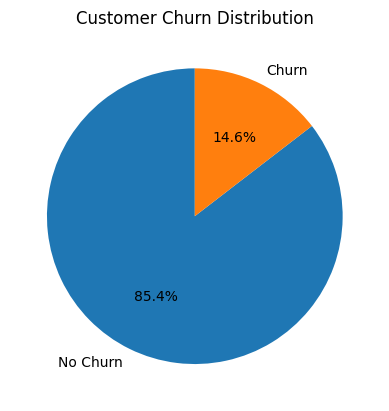

In [36]:
churn_counts = df['Churn'].value_counts()

plt.figure()
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.show()

#### Insight:

- ~85.4% customers are retained, ~14.6% churned.

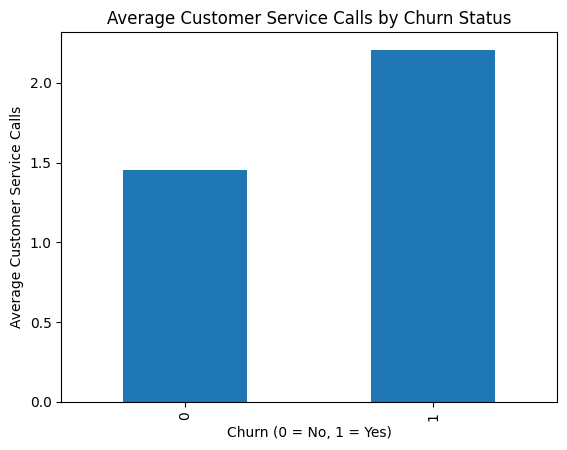

In [37]:
avg_complaints = df.groupby('Churn')['Customer service calls'].mean()

plt.figure()
avg_complaints.plot(kind='bar')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Customer Service Calls')
plt.title('Average Customer Service Calls by Churn Status')
plt.show()


#### Insight:

Churn is strongly associated with higher complaint frequency.

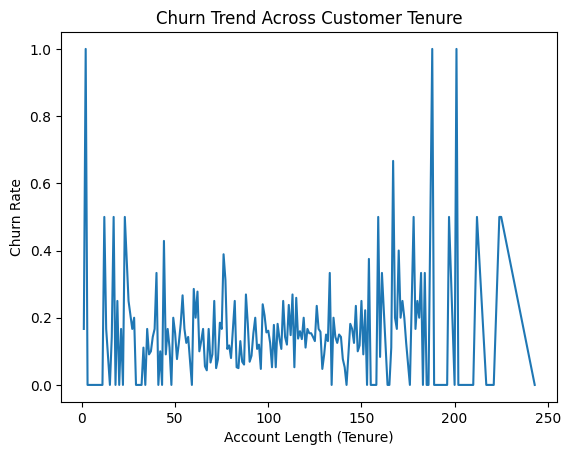

In [38]:
tenure_trend = df.groupby('Account length')['Churn'].mean()

plt.figure()
plt.plot(tenure_trend.index, tenure_trend.values)
plt.xlabel('Account Length (Tenure)')
plt.ylabel('Churn Rate')
plt.title('Churn Trend Across Customer Tenure')
plt.show()


#### Insight:

- Short-tenure customers are more likely to churn.

* Longer-tenure customers are generally loyal.

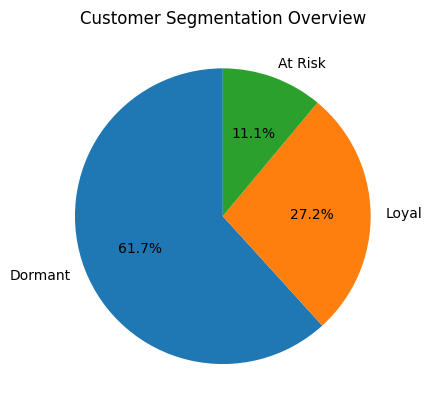

In [39]:
segment_counts = df['Customer_Segment'].value_counts()

plt.figure()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation Overview')
plt.show()


#### Insight:

Segmentation highlights proportion of at-risk vs loyal vs dormant customers, helping marketing and retention teams.